Obtention des données via la banque Hydro :

X	Export (csv) H-TEMPS; stations H5920010, H5920011, H5920014	24/07/2017 11:20	REALISE	h-temps.zip

# Lecture des données 

In [1]:
import pandas as pd

In [2]:
from io import StringIO

1ère étape : séparer le fichier d'input en trois StringIO.

In [7]:
def make_inputs():
    """Parses the input datafile and returns StringIO objects."""
    lines = open('data/8170_1_h-temps.csv', encoding='latin1').readlines()
    indices = [ind for ind, line in enumerate(lines) if line.startswith('Code station')]
    inputs = []
    for index_start, index_end in zip(indices, indices[1:] + [None]):
        inputs.append(StringIO("".join(lines[index_start:index_end])))
    return inputs

In [19]:
inputs = make_inputs()

2ème étape : construire des dataframe correctement indexées. 

In [20]:
def make_df(buffer):
    """Transforms a buffer into a proper dataframe."""
    df = pd.read_csv(buffer, skiprows=4, delimiter=';', index_col=False, usecols=[0, 1], parse_dates=[0], dayfirst=True)
    df = df.set_index('Date')
    return df

In [21]:
df0 = make_df(inputs[0])
df1 = make_df(inputs[1])
df2 = make_df(inputs[2])

# Analyse

Quelles sont les statistiques des données que nous avons pu obtenir ?

In [22]:
df0.describe()

,H (cm)
count,245511.000000
mean,124.451897
std,51.701201
min,56.000000
25%,97.500000
50%,106.900000
75%,127.700000
max,609.800000


In [23]:
df1.describe()

,H (cm)
count,44751.000000
mean,144.950381
std,90.845180
min,-167.000000
25%,92.000000
50%,109.000000
75%,163.350000
max,862.000000


In [24]:
df2.describe()

,H (cm)
count,64351.000000
mean,139.890999
std,64.523068
min,81.000000
25%,103.000000
50%,118.400000
75%,150.800000
max,609.800000


On peut dessiner ces données pour avoir une idée des données manquantes.

In [33]:
%matplotlib notebook

In [34]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


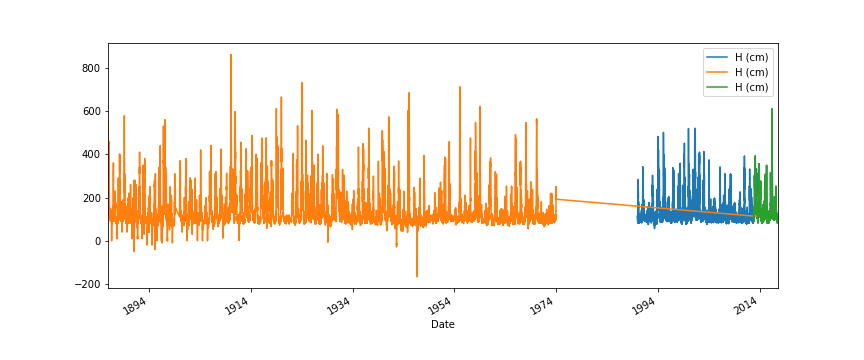

In [35]:
fig, ax = plt.subplots(figsize=(12, 5))
df0.plot(y='H (cm)', ax=ax)
df1.plot(y='H (cm)', ax=ax)
df2.plot(y='H (cm)', ax=ax)

In [36]:
df = pd.concat([df0, df1, df2])

<IPython.core.display.Javascript object>


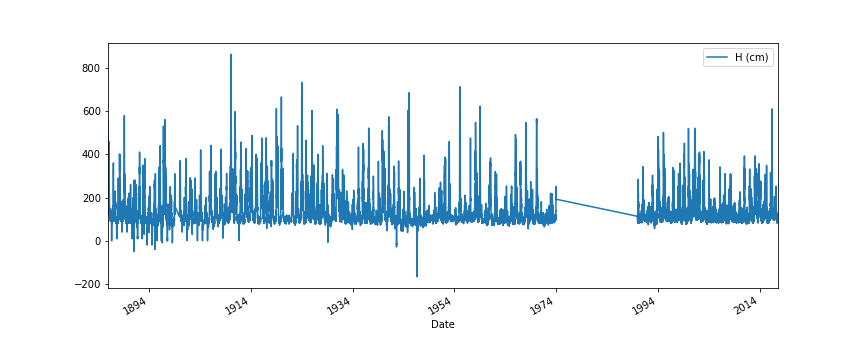

In [38]:
fig, ax = plt.subplots(figsize=(12, 5))
df.plot(y='H (cm)', ax=ax)

In [50]:
maxima = df.resample('12M').max()

<IPython.core.display.Javascript object>


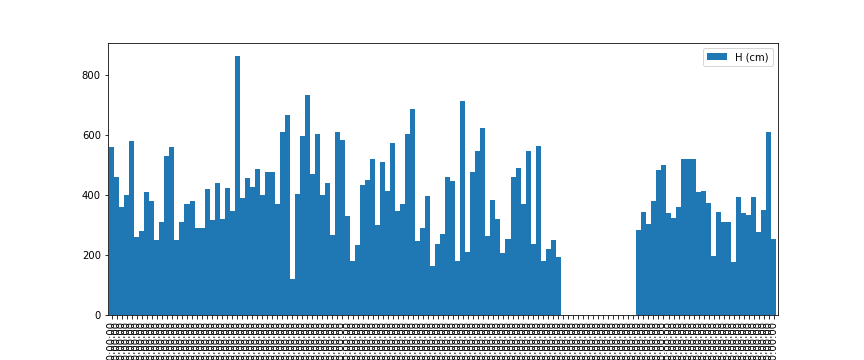

In [57]:
fig, ax = plt.subplots(figsize=(12, 5))
maxima.plot.bar(y='H (cm)', ax=ax, width=1)

In [49]:
minima = df.resample('12M').min()

<IPython.core.display.Javascript object>


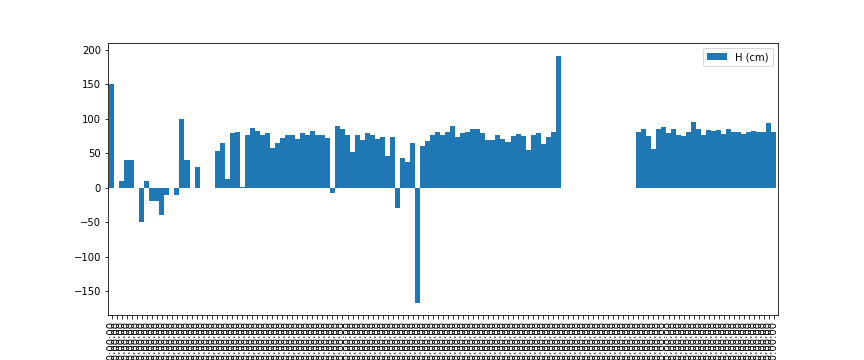

In [52]:
fig, ax = plt.subplots(figsize=(12, 5))
minima.plot.bar(y='H (cm)', ax=ax, width=1)

<IPython.core.display.Javascript object>


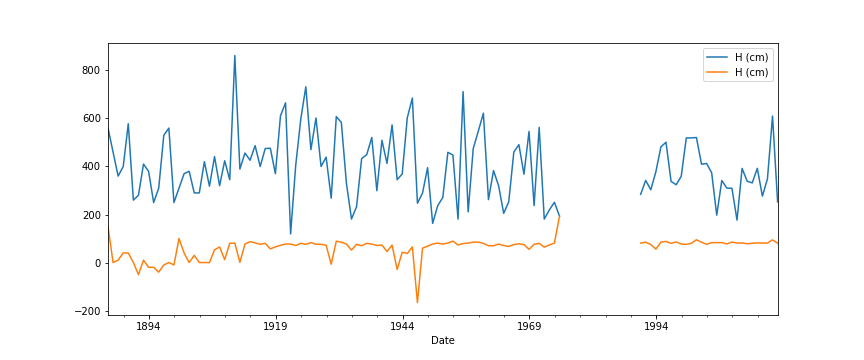

In [59]:
fig, ax = plt.subplots(figsize=(12, 5))
maxima.plot(y='H (cm)', ax=ax)
minima.plot(y='H (cm)', ax=ax)

Un histogramme :

<IPython.core.display.Javascript object>


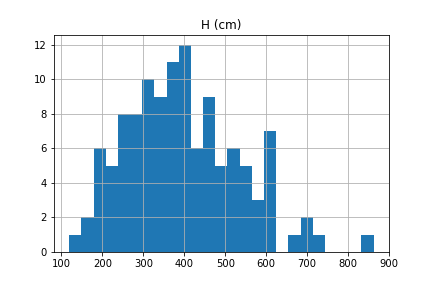

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000021ED6E10>], dtype=object)

In [65]:
fig, ax = plt.subplots()
maxima.hist(ax=ax, bins=25)

<IPython.core.display.Javascript object>


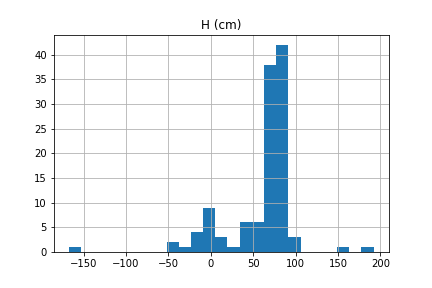

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022F90550>], dtype=object)

In [67]:
fig, ax = plt.subplots()
minima.hist(ax=ax, bins=25)